In [11]:
# coding: utf-8
import sys
import time

import matplotlib.pyplot as plt
import numpy as np

from SlopeAgent import SlopeAgent
from config import *
from FastRunningMean import FastRunningMean


"""
# This is extremely test-driven
# we don't have timestamps, symbols, etc.
# just testing if we can get some good predictions on 5-minute intervals.

# shape = (stock_n, 5, 78)

This will be a model that's working with each 78-vector.
So that it's making use of smaller minute to minute trends, rather than day to day.

We use first 3 days for training
#4 for validation
#5 for testing
"""

data = np.load("data/jan_09_2022/week.npy")
data.shape

(5436, 5, 78)

In [12]:
train = data[:,:3,:]
validation = data[:,3:4,:]
test = data[:,4:,:]
train.shape,validation.shape,test.shape

((5436, 3, 78), (5436, 1, 78), (5436, 1, 78))

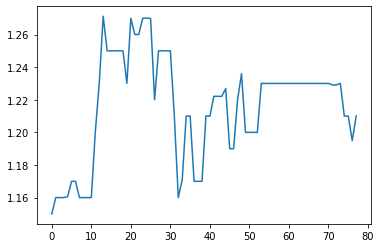

In [13]:
#train = train[0]
plt.plot(train[0][0])
plt.show()

In [16]:
prior_size = 6 # 30 minutes
prior_n = 0
for day in train[0]:
    prior = FastRunningMean()
    for i,price in enumerate(day):
        if prior_n < prior_size:
            prior.push(price)
            prior_n += 1
        elif prior_n > prior_size:
            prior.pop()
            prior_n -= 1

        if prior_n == prior_size:
            print(prior.mean())


0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.003462430511437331
0.00346243051

In [ ]:
# Timestep loop; try the agent with these parameters
day_i = 0
for i, prices in enumerate(MARKET):
    t1 = time.time()
    if prices == None:
        # End of a day

        # Sell any stocks we're still holding in our inventory
        for stock in agent.inventory:
            if agent.inventory[stock] > 0.0:
                agent.sell(stock)
                actions.append("Sell")
        if day_i == 2:
            # end of week, end simulation.
            break
        else:
            # New day
            day_i += 1

            # restart the agent from scratch with nothing changed but the money.
            # aka we make a new agent with the new earnings
            agent = SlopeAgent(agent.wallet, prior_size, slope_threshold)

            # then since this is only a marker timestep go to the next day without acting
            continue

    action = agent.act(prices)
    if action != "":
        # Agent bought or sold
        actions.append(action)

# Get resulting number of trades executed by this agent via our actions array
trades = len(actions)

# Get total % profit obtained from our agent
profits = {stock: (agent.wallet[stock] - INITIAL_WALLET[stock]) / (max(INITIAL_WALLET[stock], EPSILON)) for stock in
           STOCKS}

# Return simulated performance stats
return trades, profits

# CONSTANTS / BASICALLY CONSTANTS
prior_sizes = np.array([x ** 2 for x in range(1, 8)])

# % Average Slope the prior must be > before buying.
slope_thresholds = np.array([1e-8 * 2 ** x for x in range(20)])

results = {}
for prior_size in prior_sizes:
    for slope_threshold in slope_thresholds:
        trades, profits = simulate_performance(prior_size, slope_threshold)
        sys.stdout.write("\r{:0.2f} {:0.8f} {:0.4f}".format(
            prior_size, slope_threshold, sum(profits.values())))
        sys.stdout.flush()
        results["{:0.2f} {:0.8f}".format(prior_size, slope_threshold)] = profits

# lets try graphing each value with average over all others
# # plt.figure(figsize=(20,41))
# plt.figure(figsize=(20, 10))
# h = 1
# w = 2
# globalpriorperf = np.zeros_like(prior_sizes, dtype=np.float32)
# globalpriorslope = np.zeros_like(slope_thresholds, dtype=np.float32)
# for stock_i, stock in enumerate(STOCKS):
#     get_results = lambda a, b: results["{:0.2f} {:0.8f}".format(a, b)][stock] * 100
#     # Prior Sizes
#     x = np.arange(len(prior_sizes))
#     performance = np.zeros_like(prior_sizes, dtype=np.float32)
#     for i, prior_size in enumerate(prior_sizes):
#         for slope_threshold in slope_thresholds:
#             performance[i] += get_results(prior_size, slope_threshold)
#     performance = performance / len(slope_thresholds)
#     globalpriorperf += performance
#
#     # plt.subplot(h,w,stock_i*w+1)
#     plt.subplot(h, w, 1)
#     # plt.title(stock)
#     plt.xlabel("Prior Sizes")
#     plt.xticks(x, prior_sizes)
#     plt.xticks(rotation=90)
#     plt.ylabel("% Avg. ROI")
#     plt.plot(np.arange(len(performance)), performance, label=stock)
#     print(prior_sizes[np.argmax(performance)])
#     # plt.legend()
#     # plt.show()
#
#     # STD Thresholds
#     x = np.arange(len(slope_thresholds))
#     performance = np.zeros_like(slope_thresholds, dtype=np.float32)
#     for i, prior_size in enumerate(prior_sizes):
#         for j, slope_threshold in enumerate(slope_thresholds):
#             performance[j] += get_results(prior_size, slope_threshold)
#     performance = performance / len(prior_sizes)
#     globalpriorslope += performance
#     # plt.subplot(h,w,stock_i*w+2)
#     plt.subplot(h, w, 2)
#     # plt.title(stock)
#     plt.xlabel("Slope Thresholds")
#     plt.xticks(x, slope_thresholds)
#     plt.xticks(rotation=90)
#     plt.ylabel("% Avg. ROI")
#     plt.plot(np.arange(len(performance)), performance, label=stock)
#     print(slope_thresholds[np.argmax(performance)])
#     # plt.legend()
#     # plt.show()
#
# plt.show()
#
# # In[68]:
#
# # test performance with our parameters obtained via training set
# trades, profits = simulate_performance(19, 5.12e-06)
# np.array(list(profits.values())) * 100
#
# # In[54]:
#
#
# plt.xlabel("Prior Sizes")
# plt.xticks(np.arange(len(globalpriorperf)), prior_sizes)
# plt.ylabel("% Avg. ROI")
# plt.plot(np.arange(len(globalpriorperf)), globalpriorperf / STOCK_N)
# plt.show()
#
# # In[55]:
#
#
# plt.xlabel("Slope Thresholds")
# plt.xticks(np.arange(len(globalpriorslope)), slope_thresholds)
# plt.ylabel("% Avg. ROI")
# plt.plot(np.arange(len(globalpriorslope)), globalpriorslope / STOCK_N)
# plt.show()
#
# '''
# for i,stock in enumerate(STOCKS):
#     data = MARKET.data
#     plt.plot(np.arange(len(data[0])), data[i])
#     for j in range(len(data[0])-1,0,-len(data[0])//5):
#         plt.axvline(x=j)
#     plt.show()
#     plt.title(stock)
#     #print((data[-1]-data[0])/data[0])
# '''
